Setup

In [3]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Regrsion Lineal.

La ecuacion normal.

In [7]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

Saving figure generated_data_plot


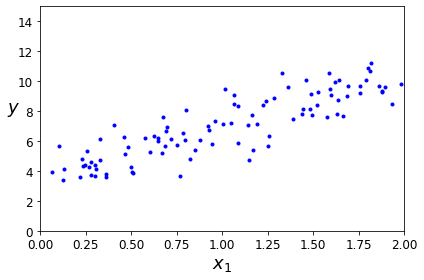

In [8]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
save_fig("generated_data_plot")
plt.show()

In [10]:
X_b=np.c_[np.ones((100,1)),X] #añade x0=1 a cada instancia
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[3.61308771],
       [3.35788041]])

In [12]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] #añade x0=1 a cada instancia
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.61308771],
       [10.32884852]])

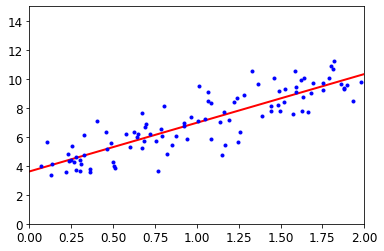

In [13]:
plt.plot(X_new,y_predict,"r-",linewidth=2,label="Predicciones")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

Saving figure linear_model_predictions_plot


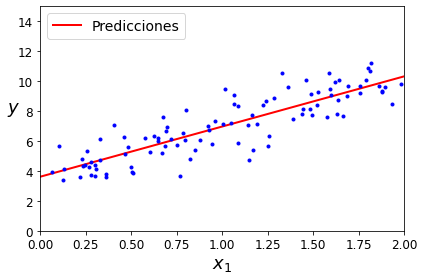

In [14]:
plt.plot(X_new,y_predict,"r-",linewidth=2,label="Predicciones")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0,2,0,15])
save_fig("linear_model_predictions_plot")
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.61308771]), array([[3.35788041]]))

In [16]:
lin_reg.predict(X_new)

array([[ 3.61308771],
       [10.32884852]])

In [17]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.61308771],
       [3.35788041]])

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[3.61308771],
       [3.35788041]])

Descenso de Gradiente
